# Preprocessing the data

This Jupyter notebook is used to preprocess the data. The data comes from footystats.org and contents the statistics of the 2015/16 to the 2022/23 season of the German 2. Bundesliga. For testing purposes, the 2022/23 season is going to be left out from the full_data.csv file.

### Create a full_data.csv file

In [1]:
import pandas as pd

seasons = [(15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22)]  # leave the test season out

df = pd.read_csv("./data/germany-2-bundesliga-matches-2015-to-2016-stats.csv")

for s_start, s_end in seasons[1::]:
    to_concat = pd.read_csv("./data/germany-2-bundesliga-matches-20{}-to-20{}-stats.csv".format(s_start, s_end))
    df = pd.concat([df, to_concat], ignore_index=True)
    
df.to_csv("./data/full_data.csv", index=False)

Now, the full_data.csv file exists and can be used to further process the data. Do not forget to apply the changes to the test dataset as well.

In [2]:
df_train = pd.read_csv("./data/full_data.csv")
df_test = pd.read_csv("./data/germany-2-bundesliga-matches-2022-to-2023-stats.csv")

In [3]:
print(len(df_train), len(df_test))

2142 306


As you can see, all games were loaded correctly. Now, the data can be preprocessed.

### Select the desired columns

In [4]:
columns = df_train.columns
columns

Index(['timestamp', 'date_GMT', 'status', 'attendance', 'home_team_name',
       'away_team_name', 'referee', 'Game Week', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_goal_timings', 'away_team_goal_timings',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_te

There are still some columns that are not needed. The following columns are going to be used.

In [5]:
needed_columns = ['Pre-Match PPG (Home)',
                  'Pre-Match PPG (Away)', 'home_team_goal_count',
                  'away_team_goal_count',
                  'home_team_corner_count', 'away_team_corner_count',
                  'home_team_yellow_cards', 'home_team_red_cards',
                  'away_team_yellow_cards', 'away_team_red_cards',
                  'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
                  'away_team_shots_on_target', 'home_team_fouls', 'away_team_fouls',
                  'home_team_possession', 'team_a_xg',
                  'team_b_xg', 'odds_ft_home_team_win',
                  'odds_ft_draw', 'odds_ft_away_team_win']

As you can see, the possession of the away team is missing. This is because the data of the possessions would correlate, because they always sum up to 100 (%). Since PDP and Shapley Values are going to be applied later, the obviously correlating data was left out.
The teams names were dropped too, since the model could always predict "win" when having a superb team in one of the columns.

In [6]:
df_train = df_train[needed_columns]
df_test = df_test[needed_columns]

In [7]:
df_train.head()

,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,...,home_team_shots_on_target,away_team_shots_on_target,home_team_fouls,away_team_fouls,home_team_possession,team_a_xg,team_b_xg,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win
0,0.0,0.0,1,3,5,0,3,0,2,0,...,4,2,13,13,50,0.0,0.0,3.24,3.30,2.39
1,0.0,0.0,1,0,9,5,2,0,2,0,...,3,0,22,28,56,0.0,0.0,2.72,3.25,2.82
2,0.0,0.0,0,0,8,4,2,0,1,0,...,5,2,8,17,57,0.0,0.0,2.24,3.40,3.45
3,0.0,0.0,0,1,2,3,2,0,2,0,...,3,2,21,24,51,0.0,0.0,3.79,3.45,2.10
4,0.0,0.0,0,1,6,3,0,0,3,0,...,10,6,16,14,43,0.0,0.0,2.12,3.45,3.73


In order to find out more possible correlations, a correlation matrix is going to be visualized.

(<Figure size 2000x2000 with 2 Axes>, <Axes: >)

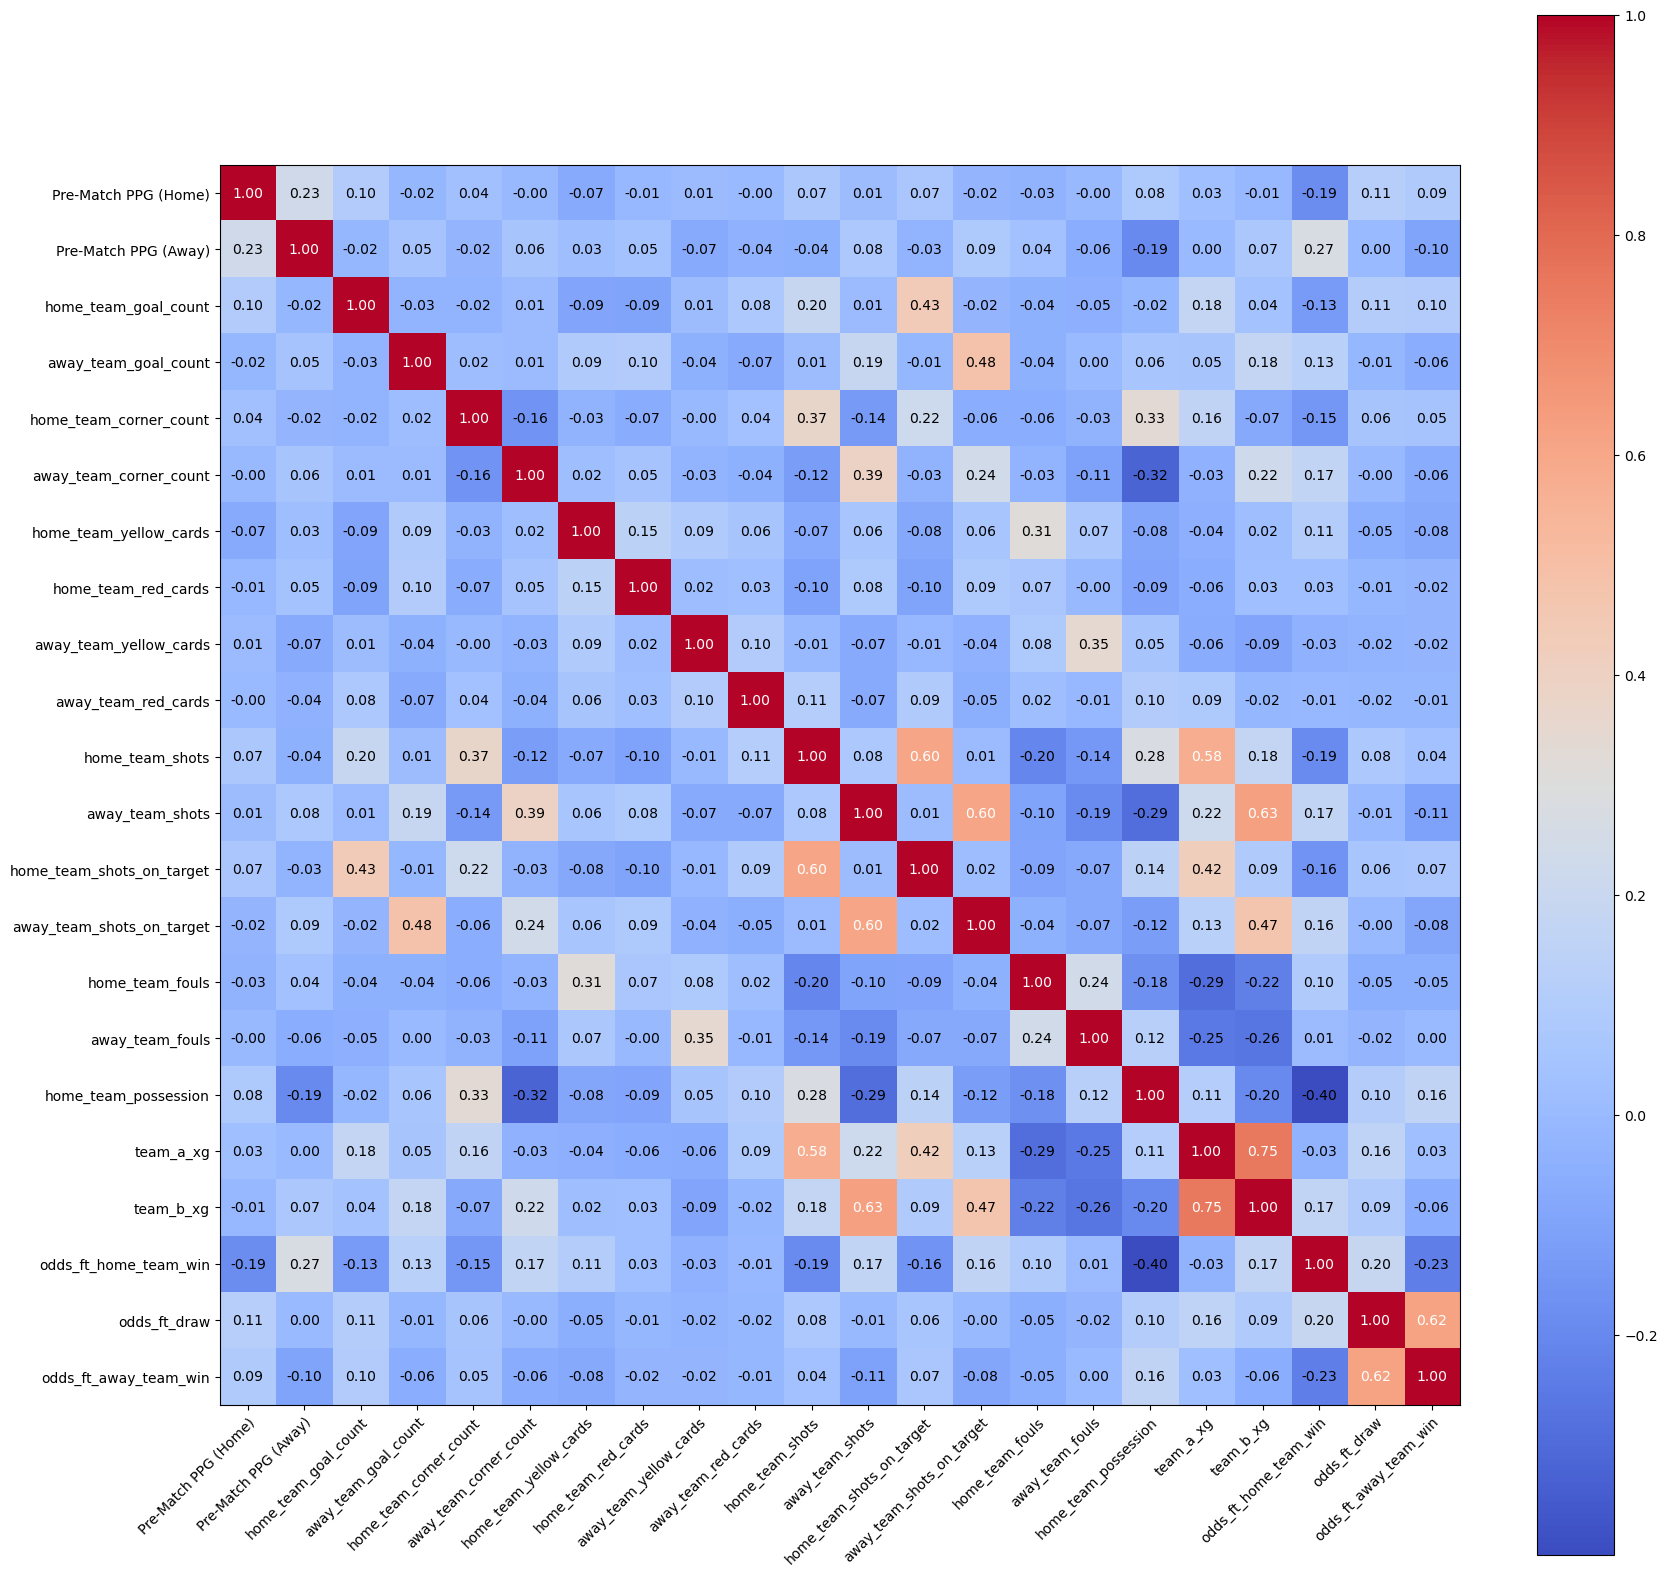

In [8]:
from mlxtend.plotting import heatmap
import numpy as np

corr_matrix = np.corrcoef(df_train.values.T)
heatmap(corr_matrix, row_names=needed_columns, column_names=needed_columns, figsize=(20, 20), cmap="coolwarm")

It is possible to see, that the correlations throughout the data are to too high. There are some correlations that are higher than 0.5, but mostly they are lower. Let us continue with the selected data and create a target label.

In [9]:
df_train["result"] = pd.Series(len(df_train))
df_test["result"] = pd.Series(len(df_test))

for index in df_train.index:
    if df_train.loc[index, "home_team_goal_count"] > df_train.loc[index, "away_team_goal_count"]:
        df_train.loc[index, "result"] = 0  # home team wins
    elif df_train.loc[index, "home_team_goal_count"] < df_train.loc[index,"away_team_goal_count"]:
        df_train.loc[index, "result"] = 2  # away team wins
    else:
        df_train.loc[index, "result"] = 1  # draw
        
for index in df_test.index:
    if df_test.loc[index, "home_team_goal_count"] > df_test.loc[index, "away_team_goal_count"]:
        df_test.loc[index, "result"] = 0
    elif df_test.loc[index, "home_team_goal_count"] < df_test.loc[index,"away_team_goal_count"]:
        df_test.loc[index, "result"] = 2
    else:
        df_test.loc[index, "result"] = 1

In [10]:
df_train.drop(["home_team_goal_count", "away_team_goal_count"], axis=1, inplace=True)
df_test.drop(["home_team_goal_count", "away_team_goal_count"], axis=1, inplace=True)

In [11]:
df_train.to_csv("./data/train.csv", index=False)
df_test.to_csv("./data/test.csv", index=False)

The preprocessing of the data is now done. The next step is to select ML-models and train them on the gathered data.